## Import and Define global variables

In [22]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from utils.dataloader import DataLoader
from utils.vis import MatplotlibVisualizer

In [14]:
## Work folfer
work_folder = "/Users/sumeetdash/MAIA/Semester 3/CAD"
data_folder = os.path.join(work_folder, 'Data')

## Visualizer
matplotlib_visualizer = MatplotlibVisualizer()

## Data Loader

200


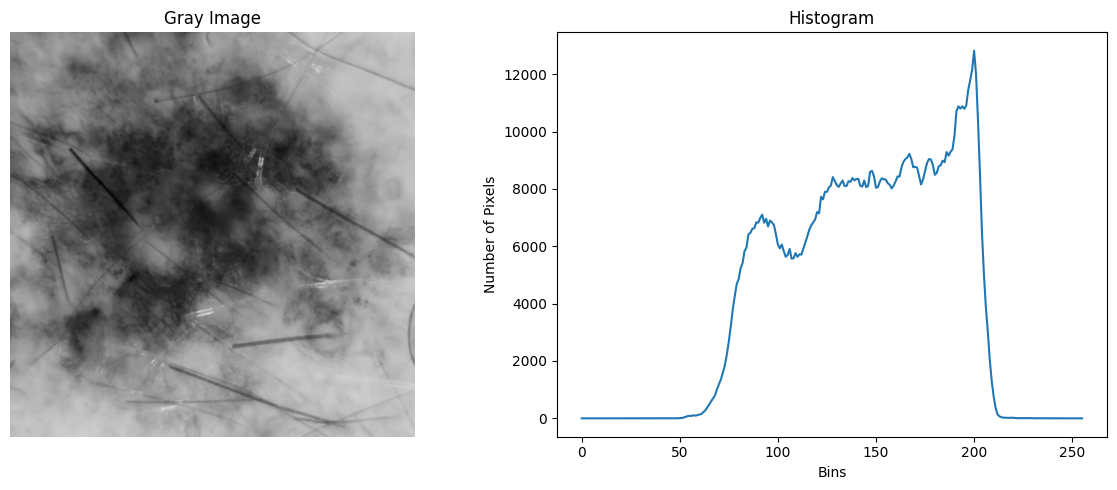

142


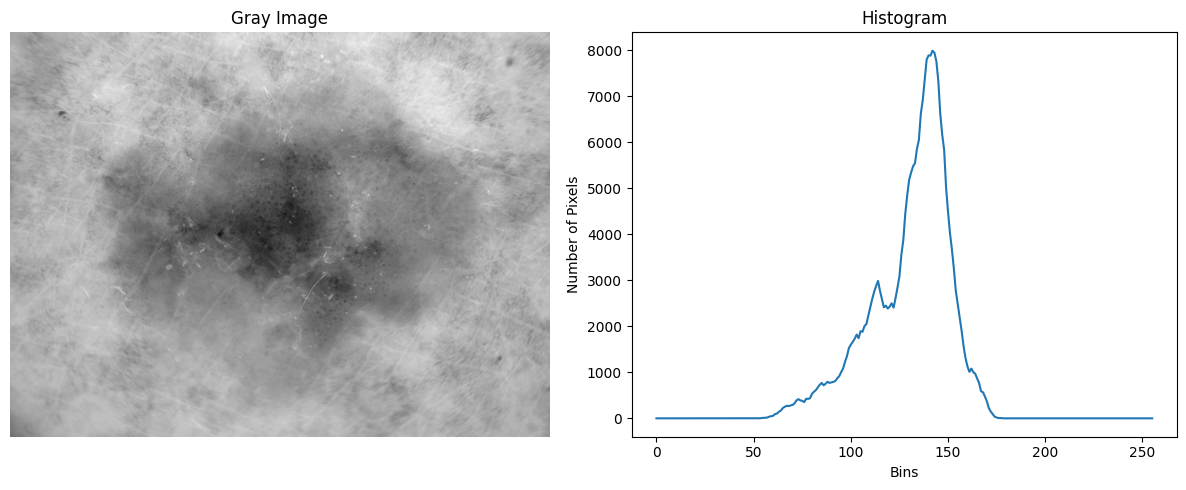

140


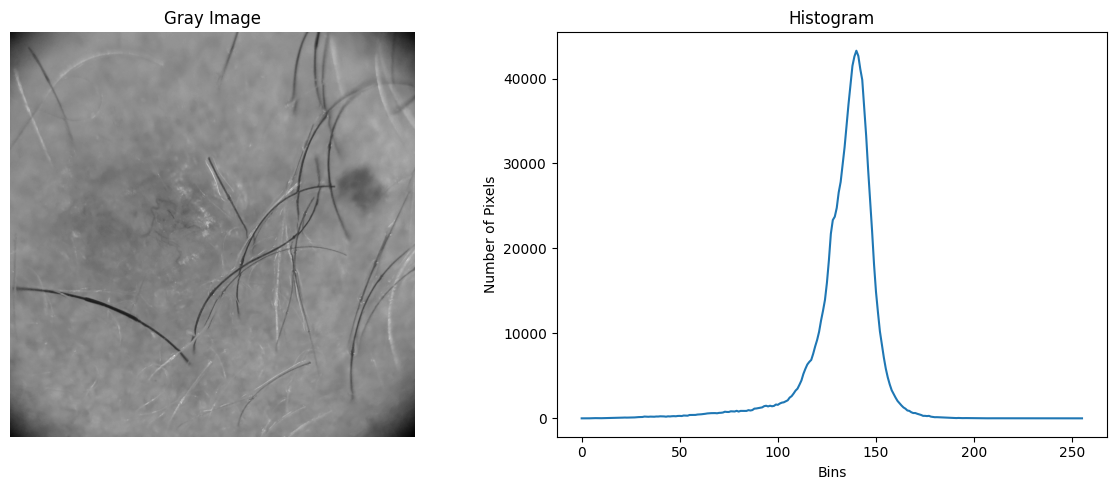

192


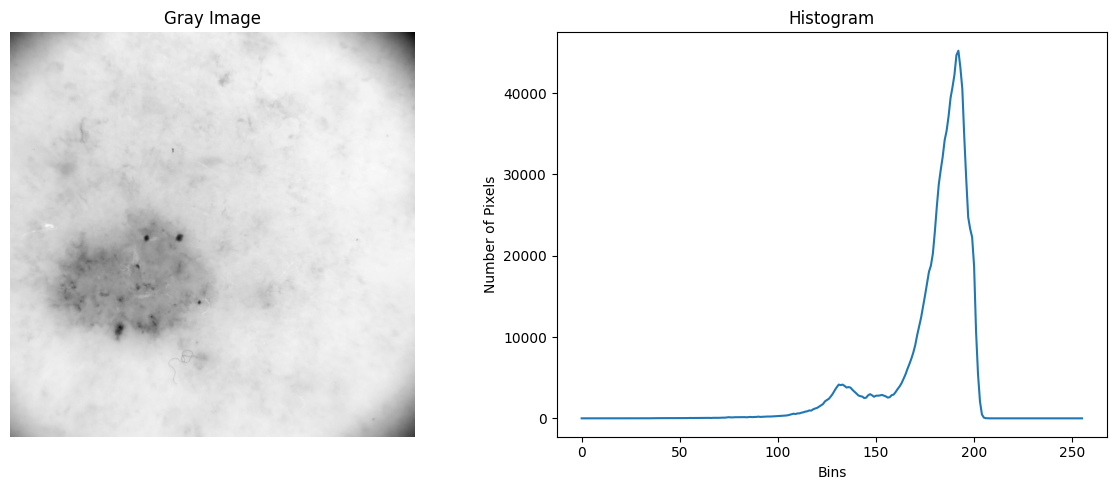

88


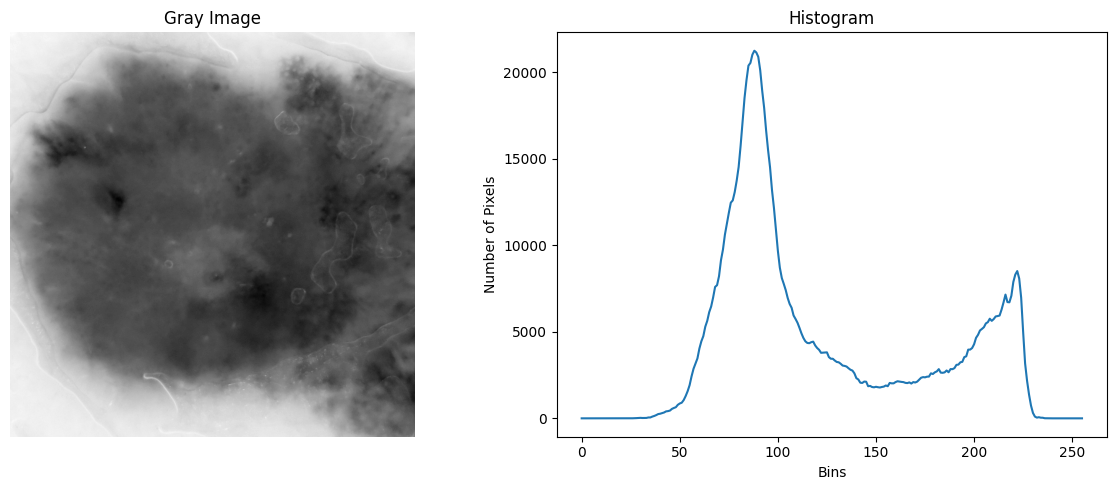

211


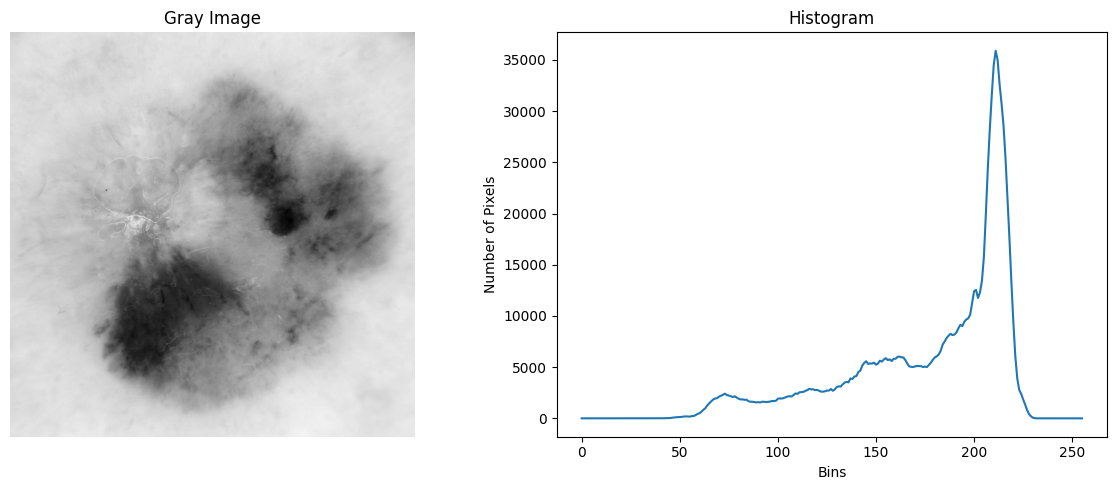

217


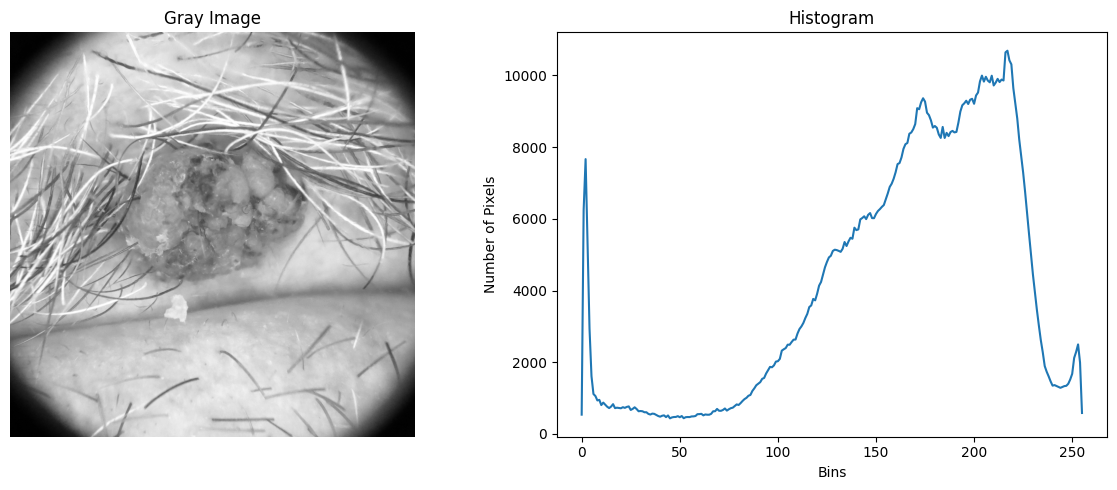

0


In [15]:
mode = 'train'

type_count1 = 0
dataloader = DataLoader(data_folder, mode)
for i, (img, label) in enumerate(dataloader):
    im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    im_hist = cv2.calcHist([im_gray], [0], None, [256], [0, 256])
    if np.argmax(im_hist) == 0:
        type_count1 += 1
    
    print(np.argmax(im_hist))
    # Show the image and histogram in one line
    matplotlib_visualizer.show_image_and_histogram(im_gray, im_hist, 
                                                image_title='Gray Image', 
                                                hist_title='Histogram', 
                                                x_label='Bins', 
                                                y_label='Number of Pixels')
    if i > 5:
        break
print(type_count1)

In [6]:
len(dataloader)

0

In [17]:
def create_tilted_structuring_elements(width, height, n):
    if width % 2 == 0 or height % 2 == 0:
        raise ValueError("Structuring element dimensions must be odd.")

    base = np.zeros((width, width), dtype=np.uint8)
    for k in range(width // 2 - height // 2, width // 2 + height // 2 + 1):
        base = cv2.line(base, (0, k), (width, k), 255)

    SEs = [base]
    angle_step = 180.0 / n
    for k in range(1, n):
        M = cv2.getRotationMatrix2D((base.shape[1] / 2.0, base.shape[0] / 2.0), k * angle_step, 1.0)
        SE = cv2.warpAffine(base, M, (width, width), flags=cv2.INTER_NEAREST)
        SEs.append(SE)

    return SEs

In [31]:
for i, (img, label) in enumerate(dataloader):
    print(i)
    # im_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    # SEs = create_tilted_structuring_elements(25, 1, 8)
    # sum_blackhats = np.zeros(im_gray.shape, np.uint16)

    # for SE in SEs:
    #     blackhat = cv2.morphologyEx(im_gray, cv2.MORPH_BLACKHAT, SE)
    #     sum_blackhats = cv2.add(sum_blackhats, blackhat.astype(np.uint16))

    # sum_blackhats = cv2.normalize(sum_blackhats, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)

    # _, thresholded = cv2.threshold(sum_blackhats, 0, 255, cv2.THRESH_BINARY | cv2.THRESH_TRIANGLE)

    # thresholded = cv2.dilate(thresholded, cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5)))

    # result = cv2.inpaint(img, thresholded, 3, cv2.INPAINT_TELEA)

    # # Plot first image
    # fig, ax = plt.subplots(1, 2)
    # ax[0].imshow(img)
    # ax[0].axis('off')  # Hide axis

    # # Plot second image
    # ax[1].imshow(result)
    # ax[1].axis('off')  # Hide axis

    # # Set titles for clarity
    # ax[0].set_title('Image')
    # ax[1].set_title('Hair Removed')

    # Display the images
    plt.show()  
    if i >= 0:
        break
print(type_count1)

0
1
0
